<a href="https://colab.research.google.com/github/Calcifer777/learn-deep-learning/blob/main/learn-pytorch/zero_to_mastery_learn_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch

torch.__version__

'1.13.1+cu116'

In [21]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [199]:
device = "cuda" if torch.cuda.is_available() else "cpu"

# 00 Pytorch fundamentals

In [24]:
# 2
t = torch.rand(7, 7)
print(f"{t.shape=}")

t.shape=torch.Size([7, 7])


In [25]:
# 3
t2 = torch.rand(1, 7)
t @ t2.T

tensor([[0.7465],
        [1.0733],
        [0.8227],
        [1.4065],
        [1.5015],
        [1.2632],
        [1.5652]])

In [26]:
# 4
torch.manual_seed(0)

In [30]:
# 5
if torch.cuda.is_available():
  torch.cuda.seed(0)

In [49]:
# 8, 9
t3 = torch.rand(3, 5)
out, idx = t3.max(axis=0)
assert out.shape == torch.Size([5])

In [50]:
# 10
t4 = torch.rand(1, 1, 1, 10)
t4.view(10)

tensor([0.6962, 0.5300, 0.2560, 0.7366, 0.0204, 0.2036, 0.3748, 0.2564, 0.3251,
        0.0902])

# 01 PyTorch Workflow Fundamentas

In [184]:
import matplotlib.pyplot as plt
from torch import nn
from pathlib import Path

In [113]:
weight = 0.7
bias = 0.3

X = torch.arange(0, 1, step=0.02).unsqueeze(1)
y = weight * X + bias + torch.rand(X.shape) * 0.2

In [114]:
split = int(0.8 * X.shape[0])
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:] 

In [172]:
def plot_predictions(
    train_data,
    train_labels,
    test_data,
    test_labels,
    predictions=None,
):
  plt.figure(figsize=(10, 7))
  plt.scatter(train_data, train_labels, c="b", s=4, label="Train data")
  plt.scatter(test_data, test_labels, c="g", s=4, label="Test data")
  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
  plt.legend(prop={"size": 14})

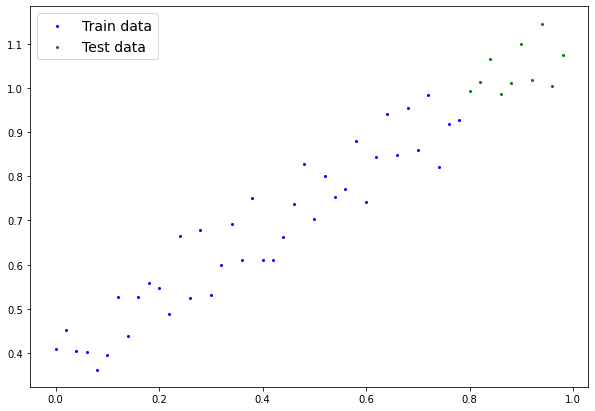

In [173]:
plot_predictions(X_train, y_train, X_test, y_test)

In [174]:
class LinearModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.rand(1, dtype=torch.float), requires_grad=True)
    self.bias = nn.Parameter(torch.rand(1, dtype=torch.float), requires_grad=True)
  def forward(self, x: torch.Tensor):
    return self.weights * x + self.bias

In [175]:
torch.manual_seed(13)
model_0 = LinearModel()
with torch.inference_mode():
  y_preds = model_0(X_test)

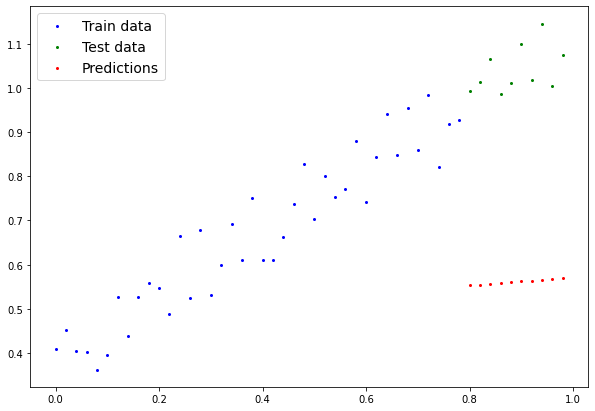

In [176]:
plot_predictions(X_train, y_train, X_test, y_test, y_preds)

In [177]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.05)

In [178]:
num_epochs = 100
epochs, train_losses, test_losses = [], [], []

for epoch in range(num_epochs):
  model_0.train()
  y_pred = model_0(X_train)
  train_loss = loss_fn(y_pred, y_train)
  optimizer.zero_grad()
  train_loss.backward()
  optimizer.step()
  model_0.eval()
  with torch.inference_mode():
    test_pred = model_0(X_test)
    test_loss = loss_fn(test_pred, y_test)
    epochs.append(epoch)
    train_losses.append(train_loss.detach().numpy())
    test_losses.append(test_loss.detach().numpy())
    if epoch % 5 == 0:
      print("Epoch: %i Loss %.2f Test Loss %.2f" % (epoch, train_loss, test_loss))

Epoch: 0 Loss 0.18 Test Loss 0.43
Epoch: 5 Loss 0.13 Test Loss 0.31
Epoch: 10 Loss 0.11 Test Loss 0.24
Epoch: 15 Loss 0.11 Test Loss 0.21
Epoch: 20 Loss 0.10 Test Loss 0.19
Epoch: 25 Loss 0.09 Test Loss 0.17
Epoch: 30 Loss 0.09 Test Loss 0.16
Epoch: 35 Loss 0.08 Test Loss 0.16
Epoch: 40 Loss 0.08 Test Loss 0.15
Epoch: 45 Loss 0.07 Test Loss 0.15
Epoch: 50 Loss 0.07 Test Loss 0.14
Epoch: 55 Loss 0.06 Test Loss 0.11
Epoch: 60 Loss 0.06 Test Loss 0.09
Epoch: 65 Loss 0.06 Test Loss 0.09
Epoch: 70 Loss 0.05 Test Loss 0.07
Epoch: 75 Loss 0.05 Test Loss 0.07
Epoch: 80 Loss 0.05 Test Loss 0.06
Epoch: 85 Loss 0.05 Test Loss 0.06
Epoch: 90 Loss 0.05 Test Loss 0.05
Epoch: 95 Loss 0.05 Test Loss 0.05


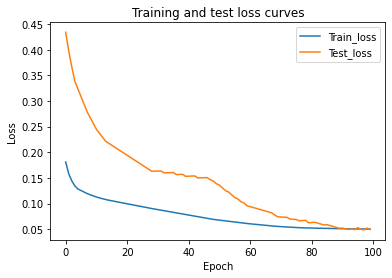

In [180]:
plt.plot(epochs, train_losses, label="Train_loss")
plt.plot(epochs, test_losses, label="Test_loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()

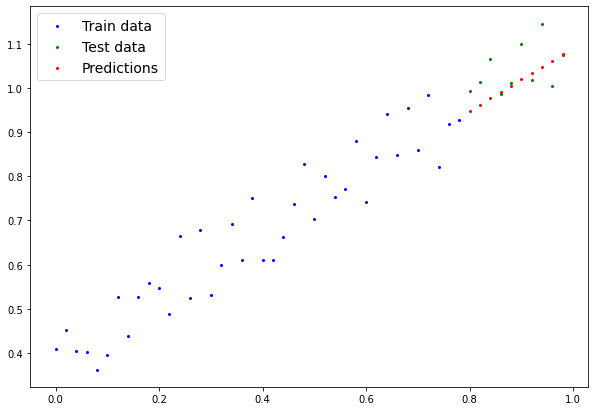

In [165]:
with torch.inference_mode():
  y_preds = model_0(X_test)
  
plot_predictions(X_train, y_train, X_test, y_test, y_preds)

In [186]:
OUTPUT_PATH = Path("models")
OUTPUT_PATH.mkdir(parents=True, exist_ok=True)
file_path = OUTPUT_PATH / "linear_model.pt"
torch.save(obj=model_0.state_dict(), f=file_path)

In [190]:
model_0_from_saved = LinearModel()
model_0_from_saved.load_state_dict(state_dict=torch.load(file_path))

<All keys matched successfully>

# 02 PyTorch Neural Network Classification

In [385]:
import numpy as np
from sklearn.datasets import make_circles

In [218]:
n_samples = 1000

X, y = make_circles(n_samples, noise=0.03, random_state=42)

In [219]:
print(f"{X.shape=}")
print(f"{y.shape=}")

X.shape=(1000, 2)
y.shape=(1000,)


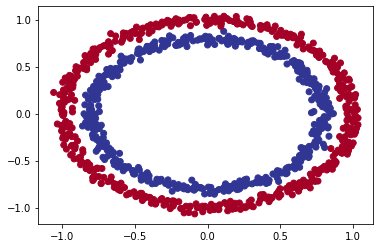

In [220]:
import matplotlib.pyplot as plt

plt.scatter(x=X[:, 0], y=X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [254]:
X_pt = torch.from_numpy(X).type(torch.float)
y_pt = torch.from_numpy(y).type(torch.float)

In [257]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pt, y_pt, test_size=0.2, random_state=32)

In [332]:
class CircleModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.l1 = nn.Linear(in_features=2, out_features=16, dtype=torch.float)
    self.l2 = nn.Linear(in_features=16, out_features=16, dtype=torch.float)
    self.l3 = nn.Linear(in_features=16, out_features=1, dtype=torch.float)
    self.relu = nn.ReLU()
    self.activation = nn.Sigmoid()

  def forward(self, x):
    x = self.l1(x)
    x = self.relu(x)
    x = self.l2(x)
    x = self.relu(x)
    x = self.l3(x)
    x = self.activation(x)
    return x

In [343]:
def accuracy(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  return correct / y_true.shape[0] * 100

In [354]:
model_0 = CircleModel().to(device)
optimizer = torch.optim.Adam(model_0.parameters(), lr=0.01)

In [355]:
num_epochs = 100

epochs = range(num_epochs)
train_losses, test_losses = [], []
train_accuracies, test_accuracies = [], []

tmpl = "Epoch %i Loss %.2f Accuracy %.2f Test Loss %.2f Test Accuracy %.2f"

for epoch in epochs:
  model_0.train()
  probs_train = model_0(X_train).squeeze()
  preds_train = torch.round(probs_train)
  loss_train = nn.BCELoss()(probs_train, y_train)
  optimizer.zero_grad()
  loss_train.backward()
  optimizer.step()
  train_losses.append(loss_train)
  accuracy_train = accuracy(y_train, preds_train)
  train_accuracies.append(accuracy_train)
  model_0.eval()
  with torch.inference_mode():
    probs_test = model_0(X_test).squeeze()
    preds_test = torch.round(probs_test)
    loss_test = nn.BCELoss()(probs_test, y_test)
  test_losses.append(loss_test)
  accuracy_test = accuracy(y_test, preds_test)
  test_accuracies.append(accuracy_test)
  if epoch % 5 == 0:
    print(tmpl % (epoch, loss_train, accuracy_train, loss_test, accuracy_test))
  

Epoch 0 Loss 0.70 Accuracy 50.12 Test Loss 0.70 Test Accuracy 49.50
Epoch 5 Loss 0.69 Accuracy 51.62 Test Loss 0.69 Test Accuracy 48.50
Epoch 10 Loss 0.69 Accuracy 51.75 Test Loss 0.69 Test Accuracy 47.50
Epoch 15 Loss 0.68 Accuracy 52.75 Test Loss 0.69 Test Accuracy 46.50
Epoch 20 Loss 0.68 Accuracy 53.87 Test Loss 0.69 Test Accuracy 48.50
Epoch 25 Loss 0.67 Accuracy 54.25 Test Loss 0.68 Test Accuracy 49.00
Epoch 30 Loss 0.67 Accuracy 59.00 Test Loss 0.67 Test Accuracy 60.50
Epoch 35 Loss 0.66 Accuracy 60.25 Test Loss 0.67 Test Accuracy 54.50
Epoch 40 Loss 0.65 Accuracy 61.12 Test Loss 0.66 Test Accuracy 57.00
Epoch 45 Loss 0.63 Accuracy 62.75 Test Loss 0.64 Test Accuracy 58.00
Epoch 50 Loss 0.61 Accuracy 65.00 Test Loss 0.62 Test Accuracy 62.00
Epoch 55 Loss 0.59 Accuracy 69.88 Test Loss 0.60 Test Accuracy 65.00
Epoch 60 Loss 0.56 Accuracy 73.75 Test Loss 0.57 Test Accuracy 74.00
Epoch 65 Loss 0.52 Accuracy 79.00 Test Loss 0.54 Test Accuracy 77.50
Epoch 70 Loss 0.49 Accuracy 81.12 Te

In [386]:
model_0.eval()
with torch.inference_mode():
  probs_test = model_0(X_test).squeeze()
  preds_test = torch.round(probs_test)

print(f"{preds_test[:15]=}".rjust(85))
print(f"{y_test[:15]=}".rjust(85))

 preds_test[:15]=tensor([0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.])
     y_test[:15]=tensor([0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.])


In [408]:
def plot_decision_boundary(model, X, y):
  # setup mesh
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1001), np.linspace(y_min, y_max, 1001))
  # reshape data
  X_mesh = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()
  # predict
  model_0.eval()
  with torch.inference_mode():
    probs_mesh = model_0(X_mesh).squeeze()
    preds_mesh = torch.round(probs_mesh)
  # reshape back
  preds_mesh_reshaped = preds_mesh.reshape(xx.shape)
  # plot
  plt.contourf(xx, yy, preds_mesh_reshaped, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)

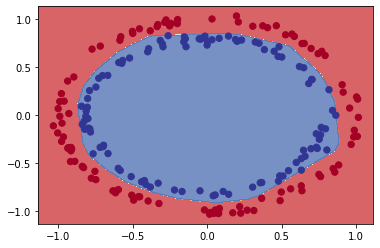

In [409]:
plot_decision_boundary(model=model_0, X=X_test, y=y_test)